This notebook is modified version of the brtdevkit intro tutorial:https://github.com/BlueRiverTechnology/brt-devkit/blob/536ec0217d2b237659f50293fa09424656024175/docs/notebooks/datasets.ipynb


In [38]:
import os 

# Set the brt-devkit environment to `prod`
os.environ['BRT_ENV'] = 'prod'
# Set the directory where assets will be downloaded. brtdevkit will automatically use this directory
# to download dataset assets if a path is not passed. useful for when you have assets downloaded already
# so that assets are not downloaded again if already there
os.environ['ASSET_DIR'] = '~/.brt'  # this is the value by default

import brtdevkit
from brtdevkit.data import Dataset

brtdevkit.log = 'info'

In [145]:
# This is Andrei's problem classes >2 set
dataset = Dataset.retrieve(name="2020-06-30_soy_13736_al_train")
print(dataset)

{
  "created_at": "2020-06-30T23:53:45.498000",
  "created_by": "5df82b3a5207f7a8800d6d38",
  "created_by_email": "andrei.polzounov@bluerivert.com",
  "description": "SOYBEANS active learning train dataset with 13736 images. Date range: 2020-04-09 17:22:08.187000 - 2020-06-17 19:09:42.621000. Active Learning. States: ['Arkansas', 'Iowa', 'Louisiana', 'Texas', 'Illinois']",
  "id": "5efbd08934742910d8c5af08",
  "is_deleted": false,
  "kind": "annotation",
  "metadata_s3_bucket": "tartarus.datasets",
  "metadata_s3_key": "prod/annotation/5efbd08934742910d8c5af08.jsonl",
  "name": "2020-06-30_soy_13736_al_train",
  "parameters": {},
  "request_s3_location": {
    "s3_bucket": "tartarus.datasets",
    "s3_key": "prod/dataset_request/5df82b3a5207f7a8800d6d38_8930a9d8b3f74b099ceda23c756c822f.json"
  },
  "state": "ready"
}


In [146]:
df = dataset.to_dataframe()
df.columns

Index(['id', 'is_deleted', 'collected_on', 'gnss', 'has_human_annotation',
       'uuid', 'artifacts_content_hash', 'angle_to_row',
       'camera_exposure_algo', 'camera_exposure_time',
       ...
       'annotation_bounding_box_0_kind',
       'annotation_bounding_box_0_nothing_to_annotate',
       'annotation_bounding_box_0_state',
       'annotation_bounding_box_0_label_map',
       'annotation_bounding_box_0_annotation_job_id',
       'annotation_bounding_box_0_vendor_metadata',
       'annotation_bounding_box_0_style',
       'annotation_bounding_box_0_bounding_boxes',
       'annotation_pixelwise_0_request_review',
       'annotation_pixelwise_0_review_requested_by'],
      dtype='object', length=101)

In [5]:
import tempfile

tmpdir = tempfile.TemporaryDirectory()
images_filtered_dirpath = f'{tmpdir.name}/{dataset.name}/filtered'
dataset.download(images_filtered_dirpath, df=df)

2020-07-22 14:43:07,360 - Dataset - INFO - start downloading dataset: 5efbd094a2d966260361da63 into /tmp/tmpuavy61pz/2020-06-30_soy_2751_al_test/filtered


2020-07-22 15:12:21,862 - Dataset - INFO - finished downloading dataset: 5efbd094a2d966260361da63


In [143]:
# check train set
# download data and look at labels
import numpy as np
pdf = df[100:140]

cnt=0
lm = 0
nans = 0
others = []
possible_nans = 0
nan_ids = []
ids = []
bbox = []
bbox_nan = []

for i in range(len(df)):
    if df.annotation_pixelwise_0_label_map.values[i] == {'1': 'crop', '2': 'weed'}:
        cnt +=1
    elif df.annotation_pixelwise_0_label_map.values[i] == {'0': 'ground', '1': 'other weed', '2': 'crop', '3': 'amaranth family', '4': 'marestail', '5': 'giant ragweed', '6': 'kochia'}:
        lm += 1
        bbox.append(df.annotation_bounding_box_0_label_map[i])
        ids.append(df.id[i])
    else:
        others.append(df.annotation_pixelwise_0_label_map.values[i])
        bbox_nan.append(df.annotation_bounding_box_0_label_map[i])
        nan_ids.append(df.id[i])
        possible_nans +=1
        
print(len(df))
print(f'There are {cnt} normal label_map images')
print(f'There are {possible_nans} nans')
print(f'There are {lm} of the 0-6 label map')

#pd.Series(nan_ids).to_csv('nan_label_ids.csv')
#pd.Series(ids).to_csv('other_label_ids.csv')
print(bbox)

2751
There are 2751 normal label_map images
There are 0 nans
There are 0 of the 0-6 label map
[]


In [144]:
an = []
count = 0 
anomalies = 0

for i in range(len(df)):
    if pd.isnull(df.annotation_bounding_box_0_label_map[i]) == True:
        count +=1
    else:
        an.append(df.annotation_bounding_box_0_label_map[i])
        anomalies +=1
print(count)
print(anomalies)
print(an)

AttributeError: 'DataFrame' object has no attribute 'annotation_bounding_box_0_label_map'

In [122]:
df[(df['id']=='ebee33de66d7d2ba0852259')|(df['id']=='ebee4e52dd74ce8ae842950')]

,id,is_deleted,collected_on,gnss,has_human_annotation,uuid,artifacts_content_hash,angle_to_row,camera_exposure_algo,camera_exposure_time,camera_focal_length,camera_fstop,camera_gain,camera_height,camera_manufacturer,camera_revision,camera_sensor_name,camera_sensor_type,camera_serial,cloud_cover,crop_damage,crop_health,crop_height,crop_name,crop_residue,experiment_id,farm,furrow_depth_inches,gps_course,gps_quality,gps_speed,group_id,grower,icp_version,isp_version,latitude,longitude,operating_field_name,operator_name,project_name,raw_bit_depth,robot_name,row_spacing,soil_color,tillage_practice,type,weed_pressure,weeds,camera_ppi,notes,artifact_nrg_0__id,artifact_nrg_0_kind,artifact_nrg_0_content_hash,artifact_nrg_0_s3_bucket,artifact_nrg_0_s3_key,artifact_nrg_0_web_s3_bucket,artifact_nrg_0_web_s3_key,artifact_nrg_0_height,artifact_nrg_0_width,annotation_pixelwise_0__id,annotation_pixelwise_0__cls,annotation_pixelwise_0_is_deleted,annotation_pixelwise_0_created_at,annotation_pixelwise_0_updated_at,annotation_pixelwise_0_review_request,annotation_pixelwise_0_review_reasons,annotation_pixelwise_0_audit_mistakes,annotation_pixelwise_0_audit_requested,annotation_pixelwise_0_label_policy,annotation_pixelwise_0_is_active_version,annotation_pixelwise_0_kind,annotation_pixelwise_0_nothing_to_annotate,annotation_pixelwise_0_state,annotation_pixelwise_0_label_map,annotation_pixelwise_0_annotation_job_id,annotation_pixelwise_0_vendor_metadata,annotation_pixelwise_0_style,annotation_pixelwise_0_s3_key,annotation_pixelwise_0_s3_bucket,annotation_pixelwise_0_prev_version,annotation_bounding_box_0__id,annotation_bounding_box_0__cls,annotation_bounding_box_0_is_deleted,annotation_bounding_box_0_created_at,annotation_bounding_box_0_updated_at,annotation_bounding_box_0_review_request,annotation_bounding_box_0_review_reasons,annotation_bounding_box_0_audit_mistakes,annotation_bounding_box_0_audit_requested,annotation_bounding_box_0_label_policy,annotation_bounding_box_0_is_active_version,annotation_bounding_box_0_kind,annotation_bounding_box_0_nothing_to_annotate,annotation_bounding_box_0_state,annotation_bounding_box_0_label_map,annotation_bounding_box_0_annotation_job_id,annotation_bounding_box_0_vendor_metadata,annotation_bounding_box_0_style,annotation_bounding_box_0_bounding_boxes,annotation_pixelwise_0_request_review,annotation_pixelwise_0_review_requested_by,label_map


In [9]:
#set option to show all columns 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

annotation_tags = df[['artifact_nrg_0_kind', 'artifact_nrg_0_content_hash',
       'artifact_nrg_0_s3_bucket', 'artifact_nrg_0_s3_key',
       'artifact_nrg_0_web_s3_bucket', 'artifact_nrg_0_web_s3_key',
       'artifact_nrg_0_height', 'artifact_nrg_0_width',
       'annotation_pixelwise_0__id', 'annotation_pixelwise_0__cls',
       'annotation_pixelwise_0_is_deleted',
       'annotation_pixelwise_0_created_at',
       'annotation_pixelwise_0_updated_at',
       'annotation_pixelwise_0_review_request',
       'annotation_pixelwise_0_review_reasons',
       'annotation_pixelwise_0_audit_mistakes',
       'annotation_pixelwise_0_audit_requested',
       'annotation_pixelwise_0_label_policy',
       'annotation_pixelwise_0_is_active_version',
       'annotation_pixelwise_0_kind',
       'annotation_pixelwise_0_nothing_to_annotate',
       'annotation_pixelwise_0_state', 'annotation_pixelwise_0_label_map',
       'annotation_pixelwise_0_annotation_job_id',
       'annotation_pixelwise_0_vendor_metadata',
       'annotation_pixelwise_0_style', 'annotation_pixelwise_0_s3_key',
       'annotation_pixelwise_0_s3_bucket',
       'annotation_pixelwise_0_prev_version']]
annotation_tags.head()

,artifact_nrg_0_kind,artifact_nrg_0_content_hash,artifact_nrg_0_s3_bucket,artifact_nrg_0_s3_key,artifact_nrg_0_web_s3_bucket,artifact_nrg_0_web_s3_key,artifact_nrg_0_height,artifact_nrg_0_width,annotation_pixelwise_0__id,annotation_pixelwise_0__cls,annotation_pixelwise_0_is_deleted,annotation_pixelwise_0_created_at,annotation_pixelwise_0_updated_at,annotation_pixelwise_0_review_request,annotation_pixelwise_0_review_reasons,annotation_pixelwise_0_audit_mistakes,annotation_pixelwise_0_audit_requested,annotation_pixelwise_0_label_policy,annotation_pixelwise_0_is_active_version,annotation_pixelwise_0_kind,annotation_pixelwise_0_nothing_to_annotate,annotation_pixelwise_0_state,annotation_pixelwise_0_label_map,annotation_pixelwise_0_annotation_job_id,annotation_pixelwise_0_vendor_metadata,annotation_pixelwise_0_style,annotation_pixelwise_0_s3_key,annotation_pixelwise_0_s3_bucket,annotation_pixelwise_0_prev_version
0,nrg,8819d328e59b3d8e585bb876e8067e69,tartarus.images,prod/2020/05/09/15/41a1106ecf1f40628f6f69c44cd...,tartarus.images,prod/2020/05/09/15/41a1106ecf1f40628f6f69c44cd...,1080,1920,5ed4cacfff012fe217a3f43b,PixelAnnotation,False,2020-06-01T09:30:55.486000,2020-06-01T09:30:55.486000,0,[],[],False,5eb48622e154067231d81219,True,labelbox,False,ok,"{'1': 'crop', '2': 'weed'}",5ed4cacfff012fe217a3f430,{'labelbox': {'vendor_project_id': 'ck9f1j5bko...,pixelwise,prod/pixelwise/5ed4cacfff012fe217a3f43b.png,tartarus.annotations,NaN
1,nrg,77f9ef0f3b063593fda1d0bf34660bf1,tartarus.images,prod/2020/05/09/15/877f627196b04787a8544fe18fe...,tartarus.images,prod/2020/05/09/15/877f627196b04787a8544fe18fe...,1080,1920,5ed4cacfff012fe217a3f43d,PixelAnnotation,False,2020-06-01T09:30:55.489000,2020-06-01T09:30:55.489000,0,[],[],False,5eb48622e154067231d81219,True,labelbox,False,ok,"{'1': 'crop', '2': 'weed'}",5ed4cacfff012fe217a3f430,{'labelbox': {'vendor_project_id': 'ck9f1j5bko...,pixelwise,prod/pixelwise/5ed4cacfff012fe217a3f43d.png,tartarus.annotations,NaN
2,nrg,7cf6d12a6a6fde836c9ca24e8d05587f,tartarus.images,prod/2020/05/09/15/74fedde90bd54cfcbedffa1d1a0...,tartarus.images,prod/2020/05/09/15/74fedde90bd54cfcbedffa1d1a0...,1080,1920,5ed4cacfff012fe217a3f447,PixelAnnotation,False,2020-06-01T09:30:55.506000,2020-06-01T09:30:55.506000,0,[],[],True,5eb48622e154067231d81219,True,labelbox,False,ok,"{'1': 'crop', '2': 'weed'}",5ed4cacfff012fe217a3f430,{'labelbox': {'vendor_project_id': 'ck9f1j5bko...,pixelwise,prod/pixelwise/5ed4cacfff012fe217a3f447.png,tartarus.annotations,NaN
3,nrg,2264f894060a10cb7326a8fa4c7bdbcb,tartarus.images,prod/2020/05/09/15/ea0948b8ed31468884390b38567...,tartarus.images,prod/2020/05/09/15/ea0948b8ed31468884390b38567...,1080,1920,5ed4cacfff012fe217a3f44d,PixelAnnotation,False,2020-06-01T09:30:55.516000,2020-06-01T09:30:55.516000,0,[],[],False,5eb48622e154067231d81219,True,labelbox,False,ok,"{'1': 'crop', '2': 'weed'}",5ed4cacfff012fe217a3f430,{'labelbox': {'vendor_project_id': 'ck9f1j5bko...,pixelwise,prod/pixelwise/5ed4cacfff012fe217a3f44d.png,tartarus.annotations,NaN
4,nrg,5eb849b0dd3f43944907db74b1d45580,tartarus.images,prod/2020/05/09/15/17bdd25100344a009644e6e3b59...,tartarus.images,prod/2020/05/09/15/17bdd25100344a009644e6e3b59...,1080,1920,5ed4cacfff012fe217a3f44f,PixelAnnotation,False,2020-06-01T09:30:55.520000,2020-06-01T09:30:55.520000,0,[],[],False,5eb48622e154067231d81219,True,labelbox,False,ok,"{'1': 'crop', '2': 'weed'}",5ed4cacfff012fe217a3f430,{'labelbox': {'vendor_project_id': 'ck9f1j5bko...,pixelwise,prod/pixelwise/5ed4cacfff012fe217a3f44f.png,tartarus.annotations,NaN


In [25]:
df['s'] = str(df['annotation_pixelwise_0__cls'])
print(df['s'].unique())

['0       PixelAnnotation\n1       PixelAnnotation\n2       PixelAnnotation\n3       PixelAnnotation\n4       PixelAnnotation\n5       PixelAnnotation\n6       PixelAnnotation\n7       PixelAnnotation\n8       PixelAnnotation\n9       PixelAnnotation\n10      PixelAnnotation\n11      PixelAnnotation\n12      PixelAnnotation\n13      PixelAnnotation\n14      PixelAnnotation\n15      PixelAnnotation\n16      PixelAnnotation\n17      PixelAnnotation\n18      PixelAnnotation\n19      PixelAnnotation\n20      PixelAnnotation\n21      PixelAnnotation\n22      PixelAnnotation\n23      PixelAnnotation\n24      PixelAnnotation\n25      PixelAnnotation\n26      PixelAnnotation\n27      PixelAnnotation\n28      PixelAnnotation\n29      PixelAnnotation\n30      PixelAnnotation\n31      PixelAnnotation\n32      PixelAnnotation\n33      PixelAnnotation\n34      PixelAnnotation\n35      PixelAnnotation\n36      PixelAnnotation\n37      PixelAnnotation\n38      PixelAnnotation\n39      PixelAnnotation

In [12]:
df.groupby(['annotation_pixelwise_0_audit_requested']).count()

,id,is_deleted,collected_on,gnss,has_human_annotation,uuid,artifacts_content_hash,angle_to_row,camera_exposure_algo,camera_exposure_time,camera_focal_length,camera_fstop,camera_gain,camera_height,camera_manufacturer,camera_ppi,camera_revision,camera_sensor_name,camera_sensor_type,camera_serial,cloud_cover,crop_damage,crop_health,crop_height,crop_name,crop_residue,experiment_id,farm,furrow_depth_inches,gps_course,gps_quality,gps_speed,group_id,grower,icp_version,isp_version,latitude,longitude,operating_field_name,operator_name,project_name,raw_bit_depth,robot_name,row_spacing,soil_color,tillage_practice,type,weed_pressure,weeds,notes,artifact_nrg_0__id,artifact_nrg_0_kind,artifact_nrg_0_content_hash,artifact_nrg_0_s3_bucket,artifact_nrg_0_s3_key,artifact_nrg_0_web_s3_bucket,artifact_nrg_0_web_s3_key,artifact_nrg_0_height,artifact_nrg_0_width,annotation_pixelwise_0__id,annotation_pixelwise_0__cls,annotation_pixelwise_0_is_deleted,annotation_pixelwise_0_created_at,annotation_pixelwise_0_updated_at,annotation_pixelwise_0_review_request,annotation_pixelwise_0_review_reasons,annotation_pixelwise_0_audit_mistakes,annotation_pixelwise_0_label_policy,annotation_pixelwise_0_is_active_version,annotation_pixelwise_0_kind,annotation_pixelwise_0_nothing_to_annotate,annotation_pixelwise_0_state,annotation_pixelwise_0_label_map,annotation_pixelwise_0_annotation_job_id,annotation_pixelwise_0_vendor_metadata,annotation_pixelwise_0_style,annotation_pixelwise_0_s3_key,annotation_pixelwise_0_s3_bucket,annotation_pixelwise_0_prev_version,s
annotation_pixelwise_0_audit_requested,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,1422,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,1990,2453
True,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,199,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,245,298


In [20]:
reviewed = df[df['annotation_pixelwise_0_audit_requested']==True]
reviewed.head()

,id,is_deleted,collected_on,gnss,has_human_annotation,uuid,artifacts_content_hash,angle_to_row,camera_exposure_algo,camera_exposure_time,camera_focal_length,camera_fstop,camera_gain,camera_height,camera_manufacturer,camera_ppi,camera_revision,camera_sensor_name,camera_sensor_type,camera_serial,cloud_cover,crop_damage,crop_health,crop_height,crop_name,crop_residue,experiment_id,farm,furrow_depth_inches,gps_course,gps_quality,gps_speed,group_id,grower,icp_version,isp_version,latitude,longitude,operating_field_name,operator_name,project_name,raw_bit_depth,robot_name,row_spacing,soil_color,tillage_practice,type,weed_pressure,weeds,notes,artifact_nrg_0__id,artifact_nrg_0_kind,artifact_nrg_0_content_hash,artifact_nrg_0_s3_bucket,artifact_nrg_0_s3_key,artifact_nrg_0_web_s3_bucket,artifact_nrg_0_web_s3_key,artifact_nrg_0_height,artifact_nrg_0_width,annotation_pixelwise_0__id,annotation_pixelwise_0__cls,annotation_pixelwise_0_is_deleted,annotation_pixelwise_0_created_at,annotation_pixelwise_0_updated_at,annotation_pixelwise_0_review_request,annotation_pixelwise_0_review_reasons,annotation_pixelwise_0_audit_mistakes,annotation_pixelwise_0_audit_requested,annotation_pixelwise_0_label_policy,annotation_pixelwise_0_is_active_version,annotation_pixelwise_0_kind,annotation_pixelwise_0_nothing_to_annotate,annotation_pixelwise_0_state,annotation_pixelwise_0_label_map,annotation_pixelwise_0_annotation_job_id,annotation_pixelwise_0_vendor_metadata,annotation_pixelwise_0_style,annotation_pixelwise_0_s3_key,annotation_pixelwise_0_s3_bucket,annotation_pixelwise_0_prev_version,s
2,5ebc903df17b614dc047cb84,False,2020-05-09T15:29:15.636000,"{'type': 'Point', 'coordinates': [-87.43442535...",True,11fc61a1-cf72-4885-bfb9-9710796dda99,7cf6d12a6a6fde836c9ca24e8d05587f,PARALLEL,fixed,1500,3.6,1.8,1,1.2954,Jabil,22.160253,2,ar0233,nrg,PCCAMJA000428,CLEAR,[NONE],HEALTHY,SMALL,SOYBEANS,HIGH,Sat 5/9/20,Evans & Sons,ZeroToTwoInches,4.545901,AUTONOMOUS,1.121963,2d151552-82bd-441d-899e-536ec7678c77,Jason Evans,ISP,7090100,38.673973,-87.434425,6.5 Acres,Nick Wood,shasta,20,DCM-OTTER,INCHES_15,MEDIUM,CONVENTIONAL,nrg,LOW,"[GREEN_FOXTAIL, OTHER]",NaN,5ebc903df17b614dc047cb83,nrg,7cf6d12a6a6fde836c9ca24e8d05587f,tartarus.images,prod/2020/05/09/15/74fedde90bd54cfcbedffa1d1a0...,tartarus.images,prod/2020/05/09/15/74fedde90bd54cfcbedffa1d1a0...,1080,1920,5ed4cacfff012fe217a3f447,PixelAnnotation,False,2020-06-01T09:30:55.506000,2020-06-01T09:30:55.506000,0,[],[],True,5eb48622e154067231d81219,True,labelbox,False,ok,"{'1': 'crop', '2': 'weed'}",5ed4cacfff012fe217a3f430,{'labelbox': {'vendor_project_id': 'ck9f1j5bko...,pixelwise,prod/pixelwise/5ed4cacfff012fe217a3f447.png,tartarus.annotations,NaN,"0 {'1': 'crop', '2': 'weed'}\n1 {'..."
10,5ebc90fbf17b614dc047d03e,False,2020-05-09T15:25:27.636000,"{'type': 'Point', 'coordinates': [-87.43460845...",True,1f36dfd6-270d-4440-8682-c321ab98dfad,dba828aa104a1ba33f1e471d1737b9ef,PARALLEL,fixed,1500,3.6,1.8,1,1.5494,Jabil,18.527425,2,ar0233,nrg,PCCAMJA000428,CLEAR,[NONE],HEALTHY,SMALL,SOYBEANS,HIGH,Sat 5/9/20,Evans & Sons,ZeroToTwoInches,4.026393,AUTONOMOUS,1.219619,f1cfecf0-1f02-4a7a-8c1b-9344cfa0a96c,Jason Evans,ISP,7090100,38.674217,-87.434608,6.5 Acres,Nick Wood,shasta,20,DCM-OTTER,INCHES_15,MEDIUM,CONVENTIONAL,nrg,LOW,"[GREEN_FOXTAIL, OTHER]",NaN,5ebc90fbf17b614dc047d03d,nrg,dba828aa104a1ba33f1e471d1737b9ef,tartarus.images,prod/2020/05/09/15/8bb034f88a8b42c7ab216e1ad30...,tartarus.images,prod/2020/05/09/15/8bb034f88a8b42c7ab216e1ad30...,1080,1920,5ed4cacfff012fe217a3f47f,PixelAnnotation,False,2020-06-01T09:30:55.599000,2020-06-01T09:30:55.599000,0,[],[],True,5eb48622e154067231d81219,True,labelbox,False,ok,"{'1': 'crop', '2': 'weed'}",5ed4cacfff012fe217a3f430,{'labelbox': {'vendor_project_id': 'ck9f1j5bko...,pixelwise,prod/pixelwise/5ed4cacfff012fe217a3f47f.png,tartarus.annotations,NaN,"0 {'1': 'crop', '2': 'weed'}\n1 {'..."
14,5ebc90fdf17b614dc047d098,False,2020-05-09T15:25:36.636000,"{'type': 'Point', 'coordinates': [-87.434532

In [19]:


import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.core.display import display, HTML
import itertools
from ipywidgets import interact

import brtdl.metrics
from brtdl.metrics.evaluate_metrics import evaluate_metrics
from brtdl.data import canonical_types, SampleKeys
from brtdl.data.dataset import PathDataset, PredictionDataset
from brtdl.data.loaders import im_reader, npy_reader
from brtdl import inference, default_arguments
from brtdl.transforms import SegmentationTransform
from brtdl.visual import colorize_segmentation

def run_browser():
    """Interactive tool to visual the annotations and results
    """

    @interact
    def browse_images(idx=(0, len(df))):
        fig, axs = plt.subplots(1,2, figsize=(40, 40))
#         plt.subplots_adjust(wspace=0.02, hspace=0.15)
        sample = df[idx]
        img = (sample[SampleKeys.image].transpose(1, 2, 0)+1 )/2
        label = sample[SampleKeys.label]
        pred = sample[SampleKeys.prediction]

        axs[0].imshow(colorize_segmentation(img, label))
        axs[0].set_title('Label', fontsize=40)
        


ModuleNotFoundError: No module named 'brtdl'

KeyError: 1375

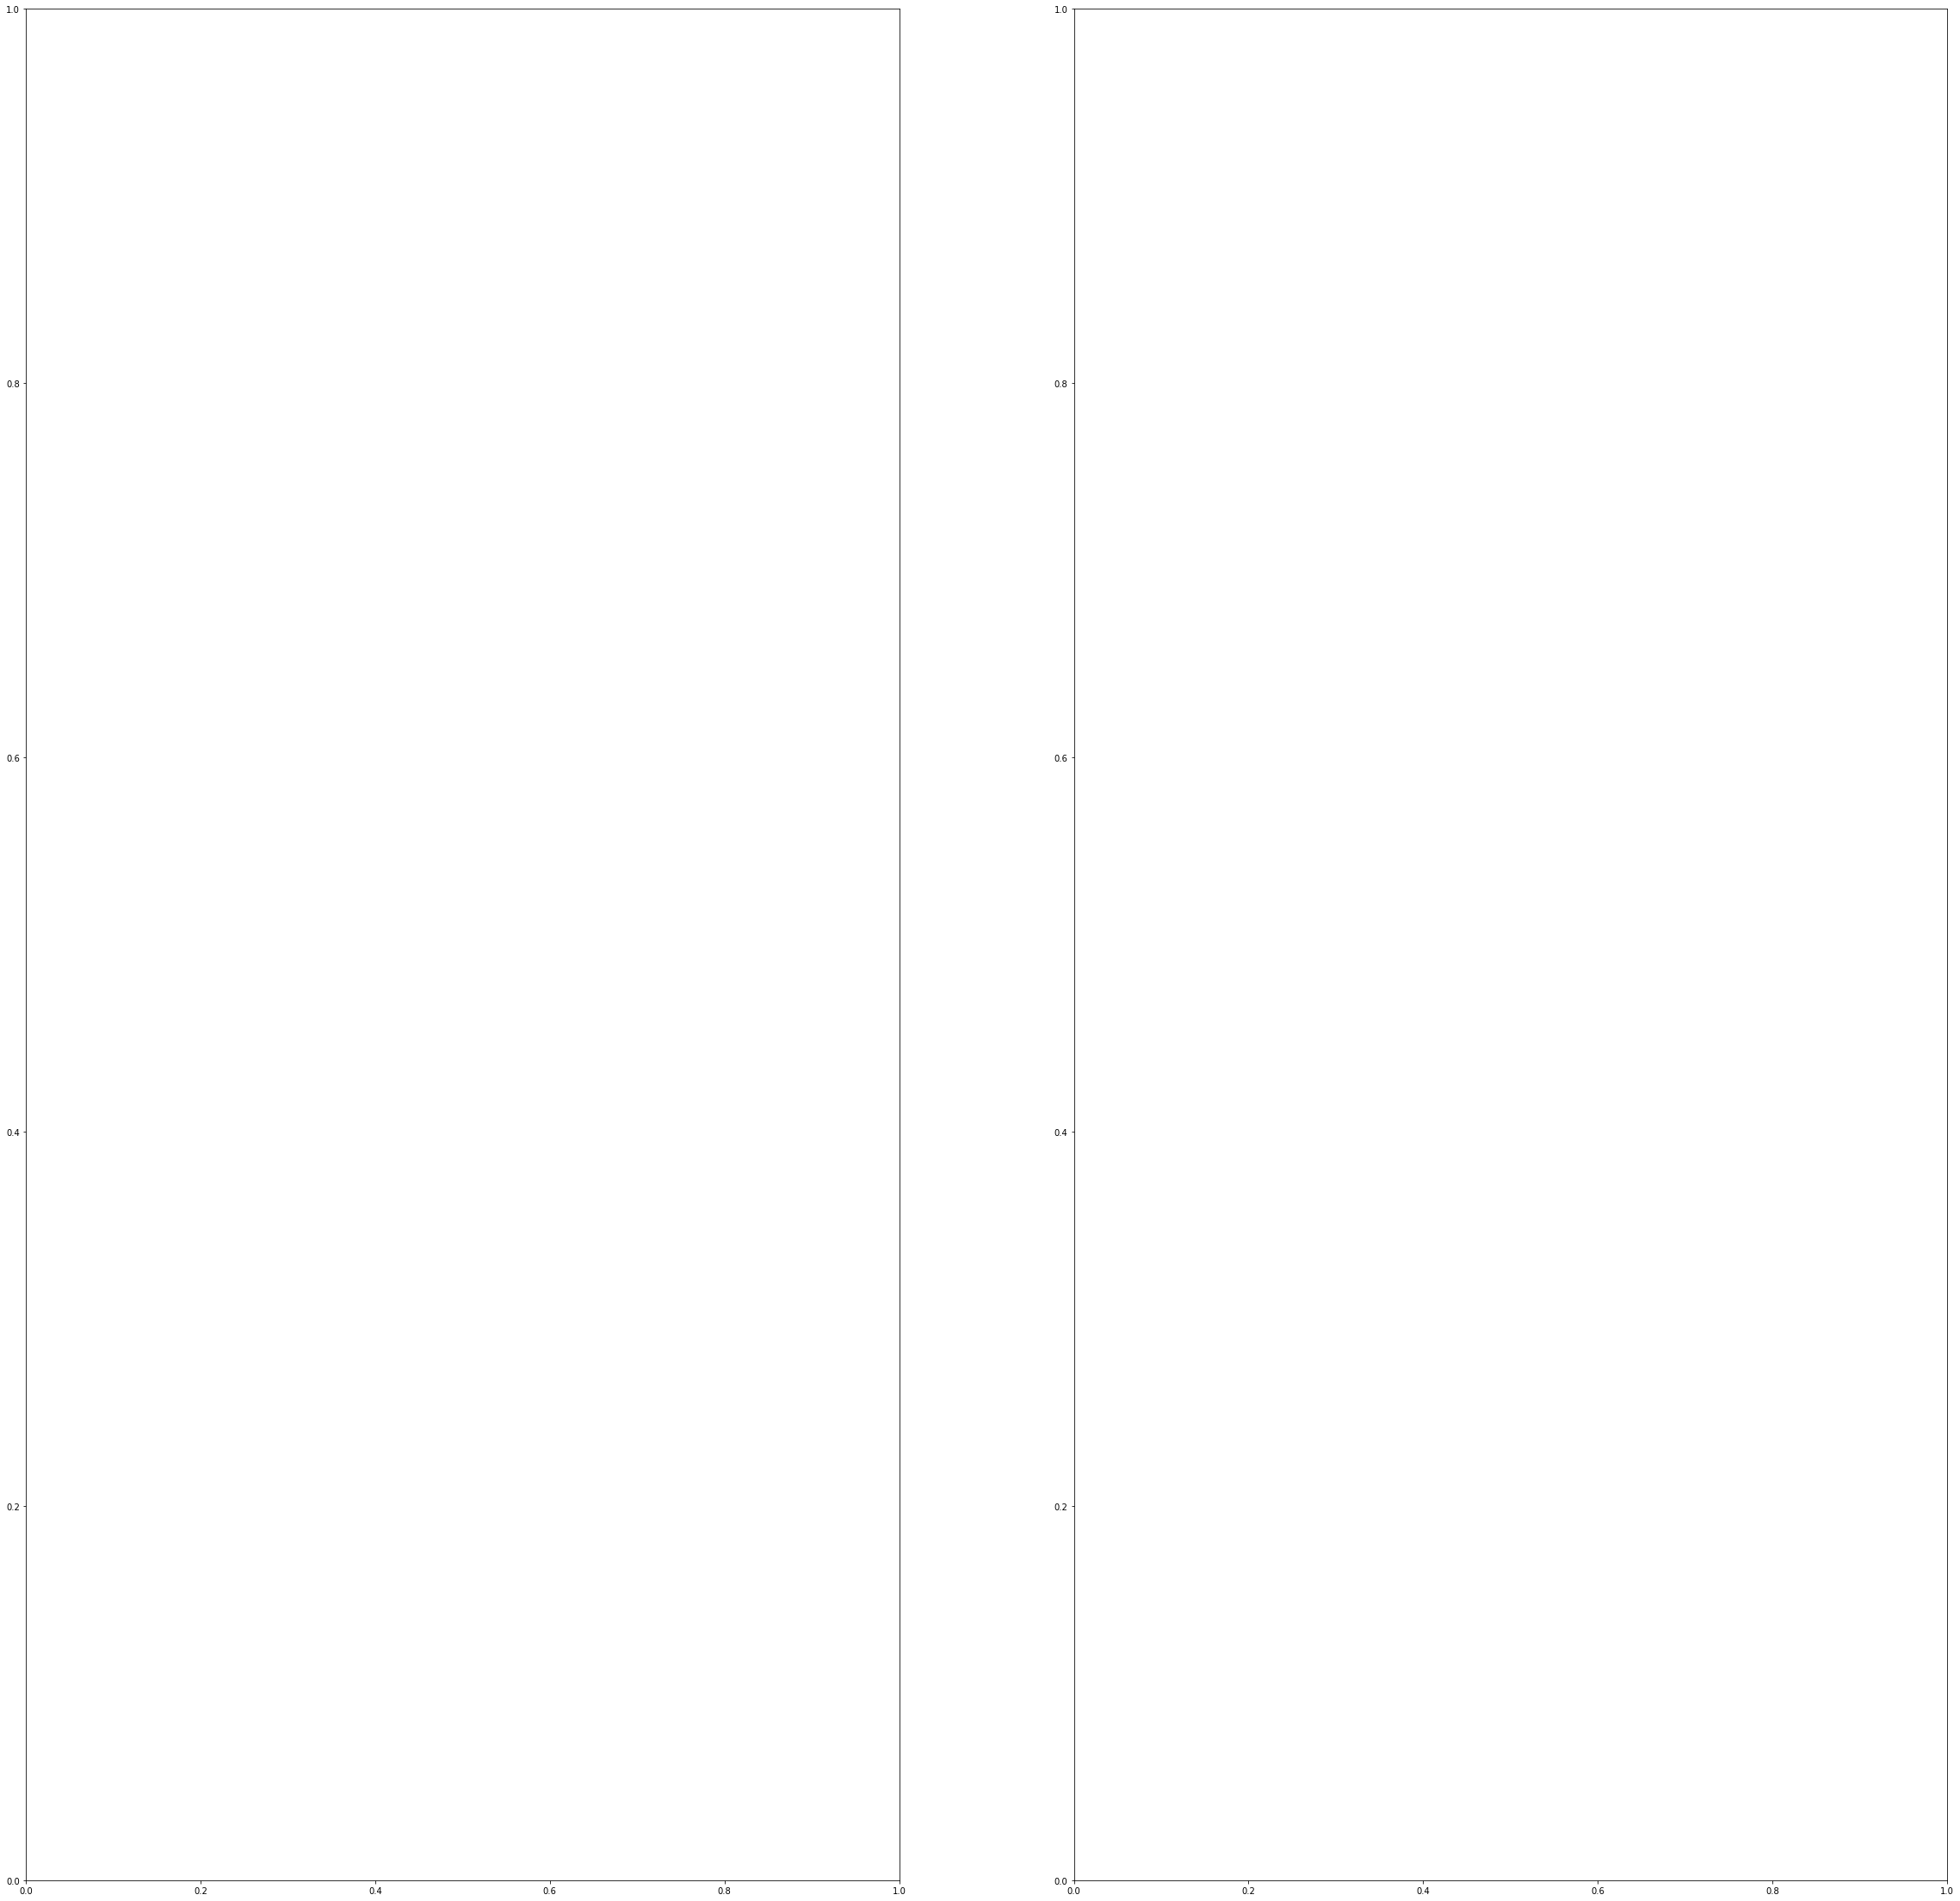

In [18]:
display(HTML("<style>.container { width:100% !important; }</style>"))
run_browser()